<a href="https://colab.research.google.com/github/IsWallison/Predictive-Analytics-Life-Insurance/blob/main/Copy_of_%5BPROJETO%5D_Regress%C3%A3o_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# PROJETO REGRESSÃO

Como falamos antes, nossos templates ficarão cada vez mais simples!!

O objetivo deste projeto é desenvolver um projeto de Regressão para prever o custo do Seguro de Vida, com [esses dados do Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction).

Aqui, queremos, como sempre, trazer o máximo de autonomia e independência pra vocês. Façam o download, e disponibilizem os seus dados, carreguem eles aqui, e desenvolvam o projeto.

## Objetivos

* Adquirir e disponibilizar os dados
* Análise completa dos dados e do problema (Na mão, ou com Pandas Profiling, SweetViz, etc)
* Desenvolver uma solução de Machine Learning eficiente com PyCaret para Regressão

LEMBREM-SE: Documentação, Storytelling, Artigo com Código! 

Mãos à obra e boa sorte!


In [1]:
!pip install schemdraw==0.15
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 1.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproje

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pycaret.utils import version
from pycaret.regression import *

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Importar os modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
np.random.seed(1)

In [230]:
df =  pd.read_csv('https://raw.githubusercontent.com/IsWallison/Predictive-Analytics-Life-Insurance/main/insurance.csv')
df_clean = df.copy()
df_clean.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [152]:
df_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [153]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [154]:
df_clean.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


metade das pessoas pagam até 9382.03 $


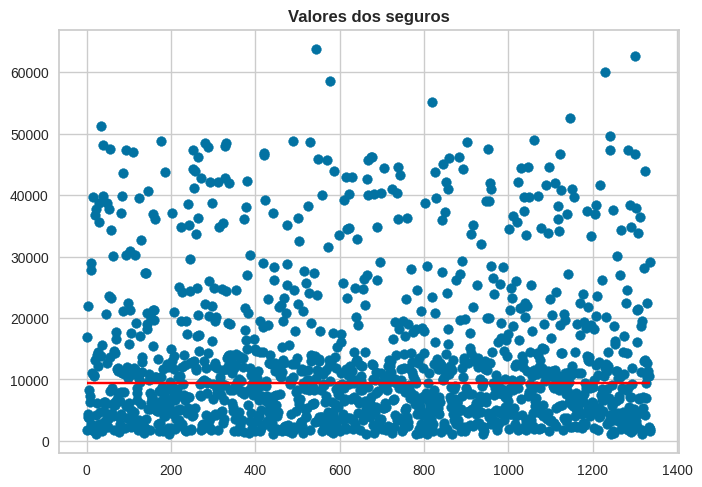

In [160]:
fig, ax = plt.subplots();
metade_valores = df['expenses'].median()
x_ini = df.index.min()
x_final = df.index.max()
print(f'metade das pessoas pagam até {metade_valores:.2f} $')

ax.scatter(y=df['expenses'],x=df.index)
ax.set_title('Valores dos seguros', fontweight='bold');
ax.set_ylabel('')
ax.hlines(y=metade_valores, xmin=x_ini, xmax=x_final,color='red',)
plt.show()

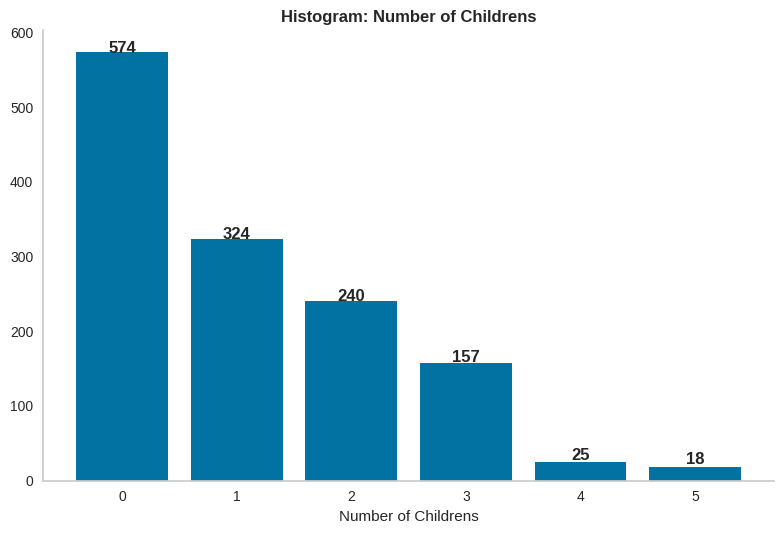

In [206]:
fig, ax = plt.subplots();

total_children = df_clean['children'].value_counts()
y = df_clean['children'].value_counts().values
x = df_clean['children'].value_counts().index
ax.bar(x, y)
ax.set_title('Histogram: Number of Childrens', fontweight='bold');
ax.set_xlabel('Number of Childrens')

def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.grid(False)


for i in range(6):
  alt = int(total_children[i])+5
  ax.text(i, i+alt, total_children[i], va='center', ha='center', fontweight='bold',)

remove_spine(ax)
plt.tight_layout()
plt.show()

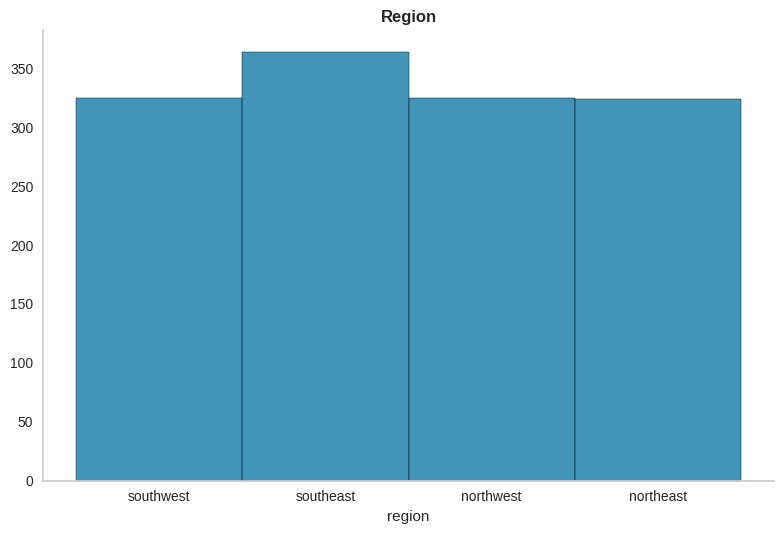

In [204]:
fig, ax = plt.subplots();

sns.histplot(x=df_clean['region'],)
ax.set_title('Histogram: Region', fontweight='bold');
ax.set_ylabel('')
total_children = df_clean['region'].value_counts()

remove_spine(ax)
plt.tight_layout()
plt.show()

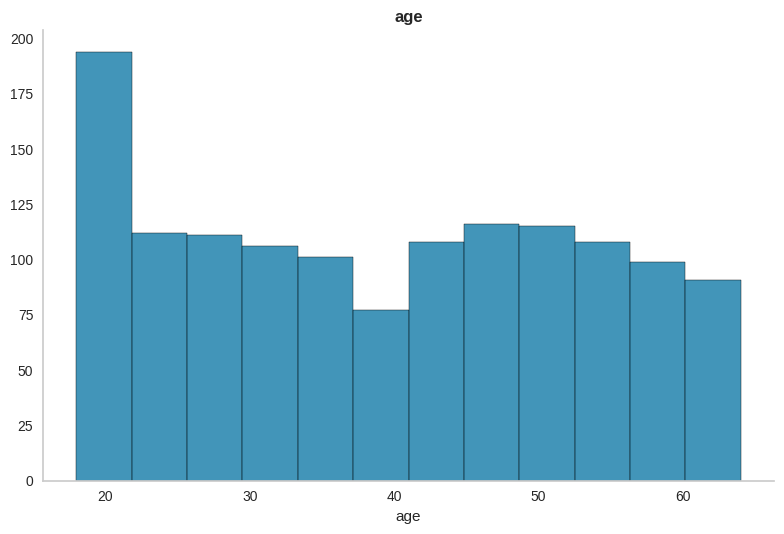

In [207]:
fig, ax = plt.subplots();

sns.histplot(x=df_clean['age'])
ax.set_title('Histogram: age', fontweight='bold');
ax.set_ylabel('')

remove_spine(ax)
plt.tight_layout()
plt.show()

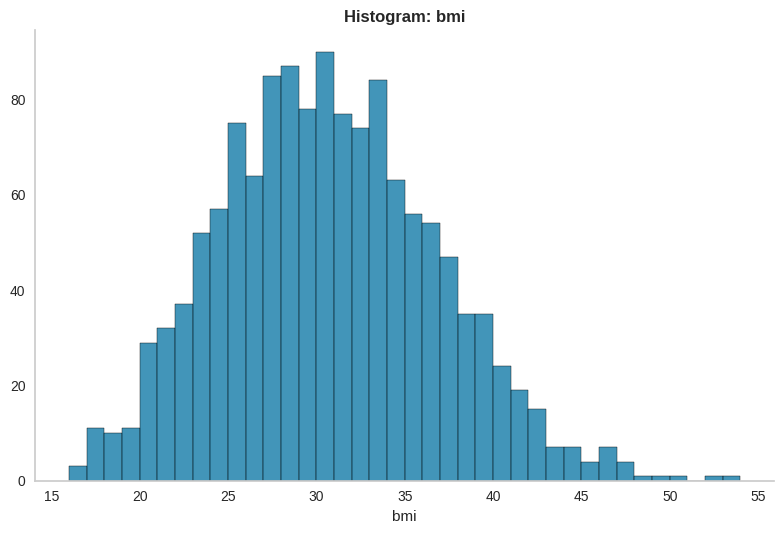

In [208]:
fig, ax = plt.subplots();

sns.histplot(x=df_clean['bmi'],binwidth=1)
ax.set_title('Histogram: bmi', fontweight='bold');
ax.set_ylabel('')

remove_spine(ax)
plt.tight_layout()
plt.show()


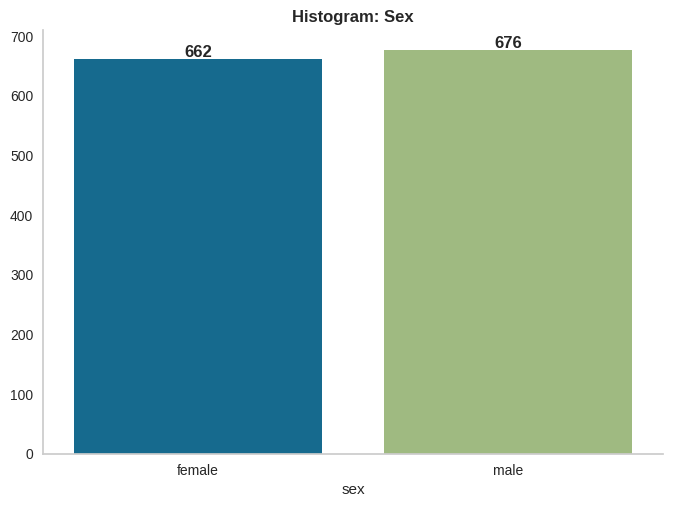

In [209]:
fig, ax = plt.subplots();
sns.countplot(x=df_clean['sex'],)
ax.set_title('Histogram: Sex', fontweight='bold');
ax.set_ylabel('')
total_sex = df_clean['sex'].value_counts(ascending=True)
remove_spine(ax)
for i in range(2):
  alt = int(total_sex[i]+10)
  ax.text(i, i+alt, total_sex[i], va='center', ha='center', fontweight='bold',)


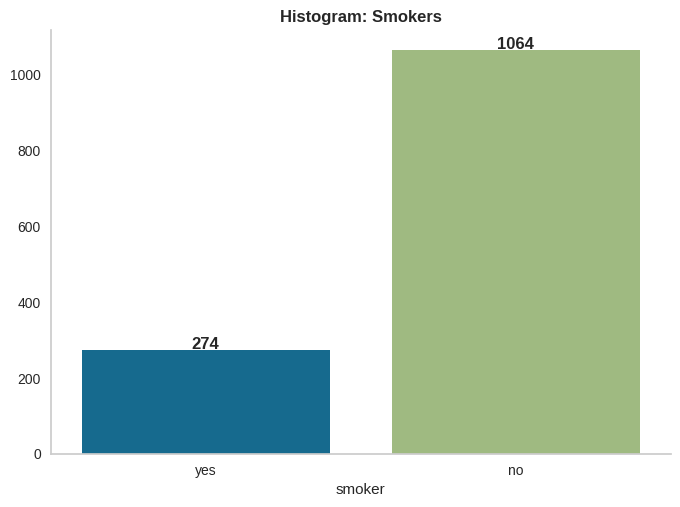

In [210]:
fig, ax = plt.subplots();
sns.countplot(x=df_clean['smoker'])
ax.set_title('Histogram: Smokers', fontweight='bold');
ax.set_ylabel('')
total_sex = df_clean['smoker'].value_counts(ascending=True)
remove_spine(ax)

for i in range(2):
  alt = int(total_sex[i]+15)
  ax.text(i, i+alt, total_sex[i], va='center', ha='center', fontweight='bold',)

In [231]:
df_clean['sex'] = (df_clean['sex']=='male').astype(int)
df_clean['smoker'] = (df_clean['smoker']=='yes').astype(int)
df_clean.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


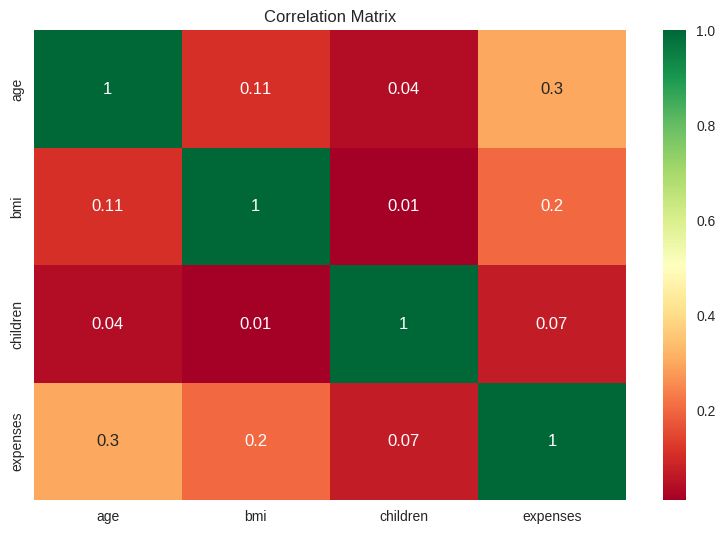

In [211]:
corr = df_clean.corr()
corr= corr.round(2)

# Create a figure and an Axes object
fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax,)

# Set the title
ax.set_title("Correlation Matrix")

# Show the plot
plt.tight_layout()
plt.show()

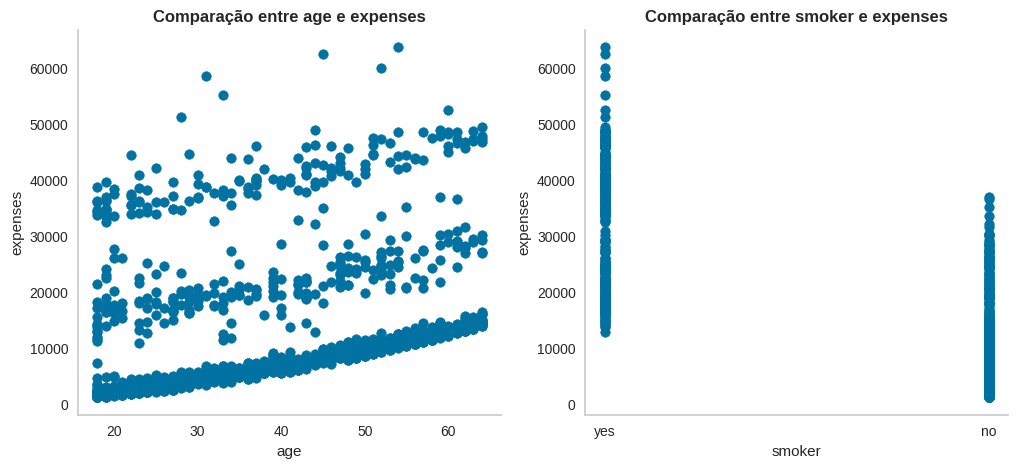

In [212]:
lst = ['age', 'smoker']
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

for i,k in enumerate(lst):
  ax = [ax1, ax2][i]
  ax.scatter(df[k], df['expenses'])
  ax.set_xlabel(f'{k}')
  ax.set_ylabel('expenses')
  ax.set_title(f'Comparação entre {k} e expenses', fontweight='bold')
  remove_spine(ax)
plt.show()


In [258]:
train, test = train_test_split(df_clean, test_size=0.3, random_state=42)

# Exibir o tamanho dos conjuntos de treinamento e teste
print('Train:', train.shape)
print('Test:', test.shape)

Train: (936, 7)
Test: (402, 7)


In [259]:
s = setup(data=train,target = 'expenses')

,Description,Value
0,Session id,364
1,Target,expenses
2,Target type,Regression
3,Original data shape,"(936, 7)"
4,Transformed data shape,"(936, 10)"
5,Transformed train set shape,"(655, 10)"
6,Transformed test set shape,"(281, 10)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [260]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2725.7923,22756336.7636,4664.5856,0.8205,0.4436,0.3178,0.6590
lightgbm,Light Gradient Boosting Machine,2967.8614,24921107.7588,4884.4922,0.8043,0.5667,0.3685,0.3500
rf,Random Forest Regressor,2929.9403,26079188.9514,5010.3426,0.7939,0.4944,0.3606,0.7490
ada,AdaBoost Regressor,4179.9750,28362996.1870,5275.5436,0.7763,0.5945,0.6597,0.2220
et,Extra Trees Regressor,2978.5449,28938581.3697,5270.0746,0.7713,0.4905,0.3395,0.7000
xgboost,Extreme Gradient Boosting,3201.3487,29348611.6000,5332.3826,0.7673,0.5542,0.3945,0.3000
ridge,Ridge Regression,4434.2035,37928242.2645,6096.8835,0.7162,0.6126,0.4801,0.1930
br,Bayesian Ridge,4430.8996,37930379.3747,6096.7868,0.7161,0.6050,0.4795,0.1990
lar,Least Angle Regression,4425.0841,37925805.2171,6095.9930,0.7160,0.5998,0.4785,0.2990
llar,Lasso Least Angle Regression,4424.7280,37922068.9570,6095.7021,0.7160,0.6009,0.4784,0.2020


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [216]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

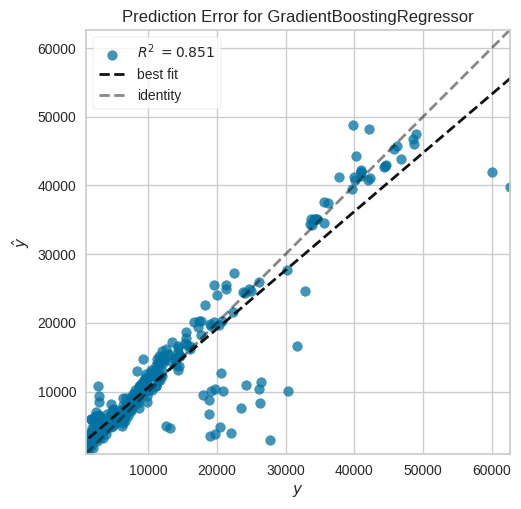

In [217]:
plot_model(best, plot='error')

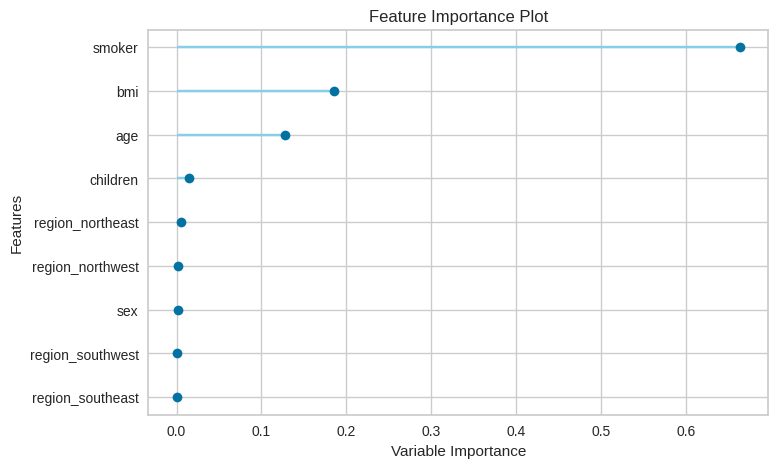

In [218]:
plot_model(best, plot='feature')

In [219]:
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2701.9493,22900911.1454,4785.4896,0.8506,0.4601,0.3343


In [220]:
pred = predict_model(best,data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2617.0597,20639084.9547,4543.0260,0.8592,0.4377,0.3124


In [221]:
unseen_predictions = predict_model(best, data=df_clean)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2320.2161,17171693.2121,4143.8742,0.8828,0.3908,0.2776


,age,sex,bmi,children,smoker,region,expenses,prediction_label
0,19,female,27.900000,0,yes,southwest,16884.919922,18458.377419
1,18,male,33.799999,1,no,southeast,1725.550049,3287.462898
2,28,male,33.000000,3,no,southeast,4449.459961,6577.253619
3,33,male,22.700001,0,no,northwest,21984.470703,3904.655919
4,32,male,28.900000,0,no,northwest,3866.860107,3791.610224
...,...,...,...,...,...,...,...,...
1333,50,male,31.000000,3,no,northwest,10600.549805,10198.594352
1334,18,female,31.900000,0,no,northeast,2205.979980,4515.687235
1335,18,female,36.900002,0,no,southeast,1629.829956,2715.139791
1336,21,female,25.799999,0,no,southwest,2007.949951,2768.185108


In [223]:
unseen_predictions['new'] = round((unseen_predictions['prediction_label']*100)/unseen_predictions['expenses'])
unseen_predictions

,age,sex,bmi,children,smoker,region,expenses,prediction_label,new
0,19,female,27.900000,0,yes,southwest,16884.919922,18458.377419,109.0
1,18,male,33.799999,1,no,southeast,1725.550049,3287.462898,191.0
2,28,male,33.000000,3,no,southeast,4449.459961,6577.253619,148.0
3,33,male,22.700001,0,no,northwest,21984.470703,3904.655919,18.0
4,32,male,28.900000,0,no,northwest,3866.860107,3791.610224,98.0
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.000000,3,no,northwest,10600.549805,10198.594352,96.0
1334,18,female,31.900000,0,no,northeast,2205.979980,4515.687235,205.0
1335,18,female,36.900002,0,no,southeast,1629.829956,2715.139791,167.0
1336,21,female,25.799999,0,no,southwest,2007.949951,2768.185108,138.0


#manual


In [311]:
df_clean_encod = pd.get_dummies(df_clean)

X = df_clean_encod.drop('expenses',axis=1)
y = df_clean_encod['expenses']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print('X Train : ', X_train.shape )
print('X Test : ', X_test.shape)
print('Y Train : ', y_train.shape)
print('y Test : ',y_test.shape)

X Train :  (1003, 9)
X Test :  (335, 9)
Y Train :  (1003,)
y Test :  (335,)


In [312]:
def transform(modelo, scale=False):

  X = df_clean_encod.drop('expenses',axis=1)
  y = df_clean_encod['expenses']
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  clf = modelo.fit(X_train,y_train)
  scores = cross_val_score(clf, X, y, cv=5, scoring='r2')
  
  return scores.mean()

In [313]:
modelos = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),
            XGBRegressor(), MLPRegressor(), ExtraTreesRegressor(),Ridge()]
model = []
scores = []

f1 = []
for i in modelos:
  score = transform(i)
  model.append(i.__class__.__name__)
  scores.append(score)

pd.DataFrame(data={'R2': scores}, 
             index=model).sort_values(by='R2',ascending=False)

,R2
RandomForestRegressor,0.836872
ExtraTreesRegressor,0.817564
XGBRegressor,0.797949
Ridge,0.746880
LinearRegression,0.746879
DecisionTreeRegressor,0.703548
MLPRegressor,0.020854


In [322]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"O R2 score do RandomForest nos dados de teste foi de {r2:.2f}")

O R2 score do RandomForest nos dados de teste foi de 0.83


559      1646.43
1087    11353.23
1020     8798.59
460     10381.48
802      2103.08
          ...   
1192    13019.16
628     11365.95
1098    23045.57
1038     2250.84
936     32108.66
Name: expenses, Length: 335, dtype: float64